In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

print(torch.__version__)

import os, sys
sys.path.insert(0, os.path.abspath(os.path.join("..")))
from tools import plot, utils, nn_modules
from tools.nn_modules import *
import numpy as np

import IPython.display as ipd

2.0.1


Define the filterbank models for impaired and normal hearing listeners

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


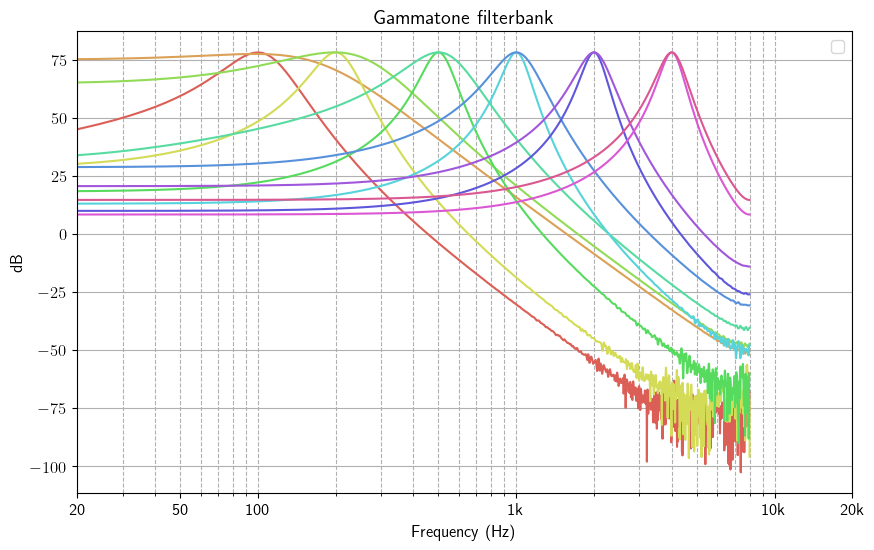

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

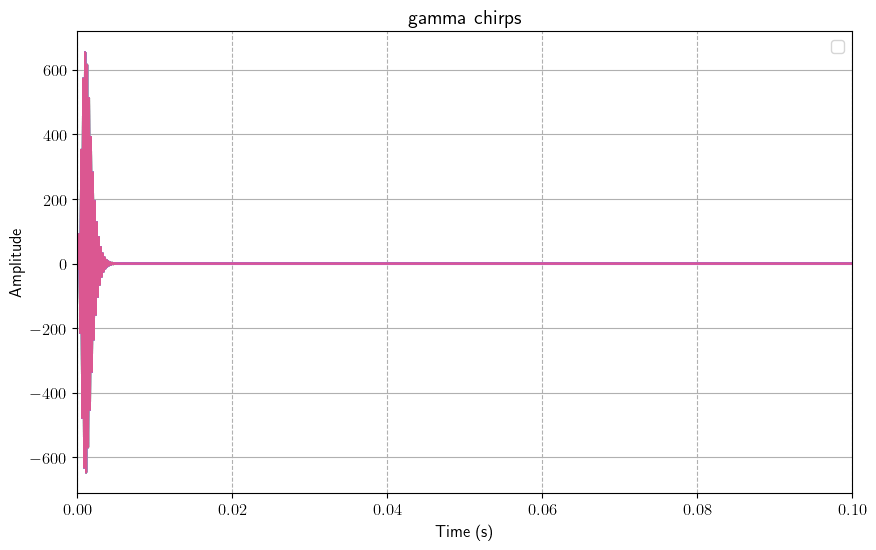

In [8]:
# define parameters
sample_rate = 16000
center_frequencies = [100, 200, 500, 1000, 2000, 4000]


filterbank_NH = GammaToneFilterbank(
    duration=.25,
    center_frequencies = center_frequencies,
    fs_hz=sample_rate,
    impairment_factor=0,
)

filterbank_HI = GammaToneFilterbank(
    duration=.25,
    center_frequencies = center_frequencies,
    fs_hz=sample_rate,
    impairment_factor=100,
)

freq_axes = []
spec_axes = []
time_signals = []
for filter_NH, filter_HI in zip(filterbank_NH.filters,filterbank_HI.filters):
    h, f = utils.get_spectrum(filter_NH.impulse_response, sample_rate=sample_rate)
    freq_axes.append(f)
    spec_axes.append(h)
    time_signals.append(filter.impulse_response)
    h, f = utils.get_spectrum(filter_HI.impulse_response, sample_rate=sample_rate)
    freq_axes.append(f)
    spec_axes.append(h)
    time_signals.append(filter.impulse_response)

# Plot IR in time-domain and magnitude repsonse
plot.magspec(freq_axes=freq_axes, spec_axes=spec_axes, title="Gammatone filterbank",
            #  labels=center_frequencies
             )
plot.timeseries(
    time_signals, sample_rate=sample_rate, xlim=[0, 0.1], title="gamma chirps",
    # labels=center_frequencies
)